**PROJECT TITLE**

Flood Occurrence Classification Model using Machine Learning

**PROBLLEM STATEMENT**

Flooding is a significant global natural disaster that results in substantial loss of life, displacement of populations, infrastructure damage, and economic hardship. The inability to accurately predict flood events in advance hinders effective disaster management and response efforts. This project aims to develop a predictive modeling framework using historical data to proactively identify areas susceptible to flooding, thereby enabling timely warnings and mitigation strategies to minimize the impact of future flood occurrences.

**SOLUTION**

This project employs a supervised machine learning approach to classify geographical areas into high-risk (flood occurred) or low-risk (no flood occurred) categories. The solution involves developing and comparing the performance of three distinct classification algorithms: Logistic Regression, 
Random Forest, and Gradient Boosting (e.g., XGBoost)

The final solution will be evaluated using the folloaing evaluation performance metrics: Accuracy, Precision, Recall, and F1-score, to select the most effective model for deployment.

**DATASET DESCRIPTION**

The dataset used for this project was sourced from Kaggle, and contains 14 features that describe various environmental and geographical factors relevant to flood prediction. 

* **Latitude**: The geographical north-south coordinate of the location.
* **Longitude**: The geographical east-west coordinate of the location.
* **Rainfall (mm)**: Total rainfall recorded in millimeters.
* **Temperature (°C)**: Average temperature in degrees Celsius.
* **Humidity (%)**: Level of moisture in the air as a percentage.
* **River Discharge (m³/s)**: The volume of water flowing in a river per second.
* **Water Level (m)**: The current height of water relative to a baseline.
* **Elevation (m)**: The height of the land above sea level.
* **Land Cover**: Type of terrain (e.g., Forest, Agricultural, Desert, Water Body).
* **Soil Type**: The composition of the ground (e.g., Clay, Peat, Loam, Sandy).
* **Population Density**: Number of people per unit area.
* **Infrastructure**: A binary indicator (1 or 0) possibly indicating presence of flood defense.
* **Historical Floods**: A binary indicator (1 or 0) denoting past flood events at the location.
* **Flood Occurred**: Target Variable: A binary indicator (1 or 0) where 1 signifies a flood occurred and 0 signifies no flood occurred.

**IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load dataset
df = pd.read_csv("Flood_Prediction_NCR_Philippines.csv")

In [7]:
# Checking the first 5 rows
df.head()

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
0,2016-01-01,Quezon City,12.0,0.5,15.3,43,0
1,2016-01-01,Marikina,10.6,1.8,23.2,15,0
2,2016-01-01,Manila,5.7,0.5,15.6,5,0
3,2016-01-01,Pasig,3.7,0.5,5.0,5,0
4,2016-01-02,Quezon City,3.4,0.5,13.3,43,0


In [9]:
# Checking the last 5 rows
df.tail()

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
7303,2020-12-30,Pasig,16.9,1.4,16.8,5,0
7304,2020-12-31,Quezon City,7.2,0.7,25.6,43,0
7305,2020-12-31,Marikina,4.8,1.3,9.6,15,0
7306,2020-12-31,Manila,7.4,1.0,11.9,5,0
7307,2020-12-31,Pasig,7.8,1.5,7.3,5,0


In [11]:
# Checking the shape to know how many rows and columns the dataset has
df.shape

(7308, 7)

In [13]:
# Checking the datatype of each column
df.dtypes

Date                 object
Location             object
Rainfall_mm         float64
WaterLevel_m        float64
SoilMoisture_pct    float64
Elevation_m           int64
FloodOccurrence       int64
dtype: object

In [15]:
# Checking if there are missing values in the dataset
df.isnull().sum()

Date                0
Location            0
Rainfall_mm         0
WaterLevel_m        0
SoilMoisture_pct    0
Elevation_m         0
FloodOccurrence     0
dtype: int64

In [17]:
# Checking if there are duplicated rows in the dataset
df.duplicated().sum()

0

In [19]:
# Checking the columns that are numeric
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Rainfall_mm', 'WaterLevel_m', 'SoilMoisture_pct', 'Elevation_m',
       'FloodOccurrence'],
      dtype='object')

In [21]:
# Checking the columns that string/object
df.select_dtypes(include='object').columns

Index(['Date', 'Location'], dtype='object')

In [23]:
# Checking the value counts of each column
for col in df.columns:
    print(f"\n{'=' * 5} {col} {'=' * 5}")
    print(df[col].value_counts(dropna=False))


===== Date =====
Date
2016-01-01    4
2019-05-12    4
2019-05-10    4
2019-05-09    4
2019-05-08    4
             ..
2017-08-28    4
2017-08-27    4
2017-08-26    4
2017-08-25    4
2020-12-31    4
Name: count, Length: 1827, dtype: int64

===== Location =====
Location
Quezon City    1827
Marikina       1827
Manila         1827
Pasig          1827
Name: count, dtype: int64

===== Rainfall_mm =====
Rainfall_mm
8.6     68
5.4     65
8.3     63
4.8     62
6.0     62
        ..
44.1     1
45.3     1
41.7     1
31.3     1
33.2     1
Name: count, Length: 380, dtype: int64

===== WaterLevel_m =====
WaterLevel_m
0.5    2645
1.0     262
0.6     261
1.1     246
0.9     243
0.7     237
0.8     234
1.3     228
1.5     222
1.4     218
1.6     216
1.2     206
1.7     200
1.8     191
2.0     189
1.9     177
2.1     147
2.2     126
2.4     125
2.5     103
2.3      97
2.6      88
2.8      79
2.7      73
2.9      71
3.1      60
3.0      58
3.3      37
3.2      35
3.5      31
3.4      28
3.7      26
3.8 

**OBSERVATION**
* There are 10003 rows and 14 columns in this dataset
* All the columns have there right datatypes
* There are 4 missing values in the entire dataset; 1 from Water Level, 1 from Land Cover, 1 from Infrastructure, and 1 from Histtorical Floods.
* There are 3 duplicate rows in the dataset


**DATA VISUALIZATION**

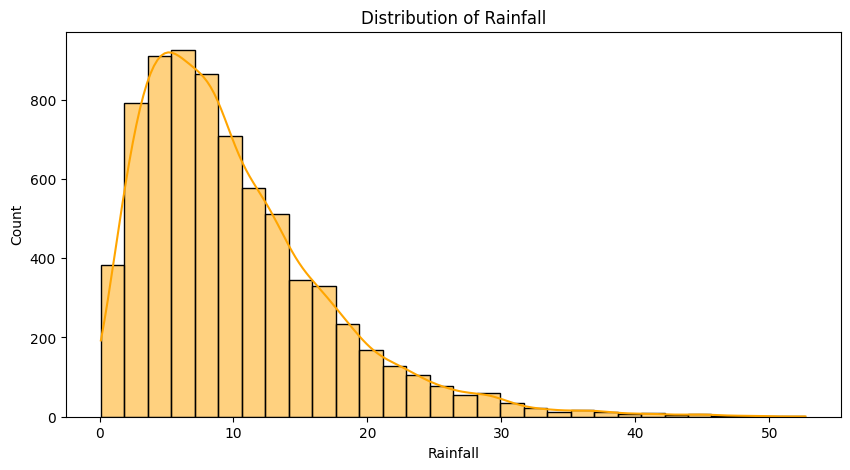

In [31]:
# Temperature Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Rainfall_mm'], kde=True, bins=30, color='orange')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
#plt.savefig('Distribution of Rainfall')
plt.show()

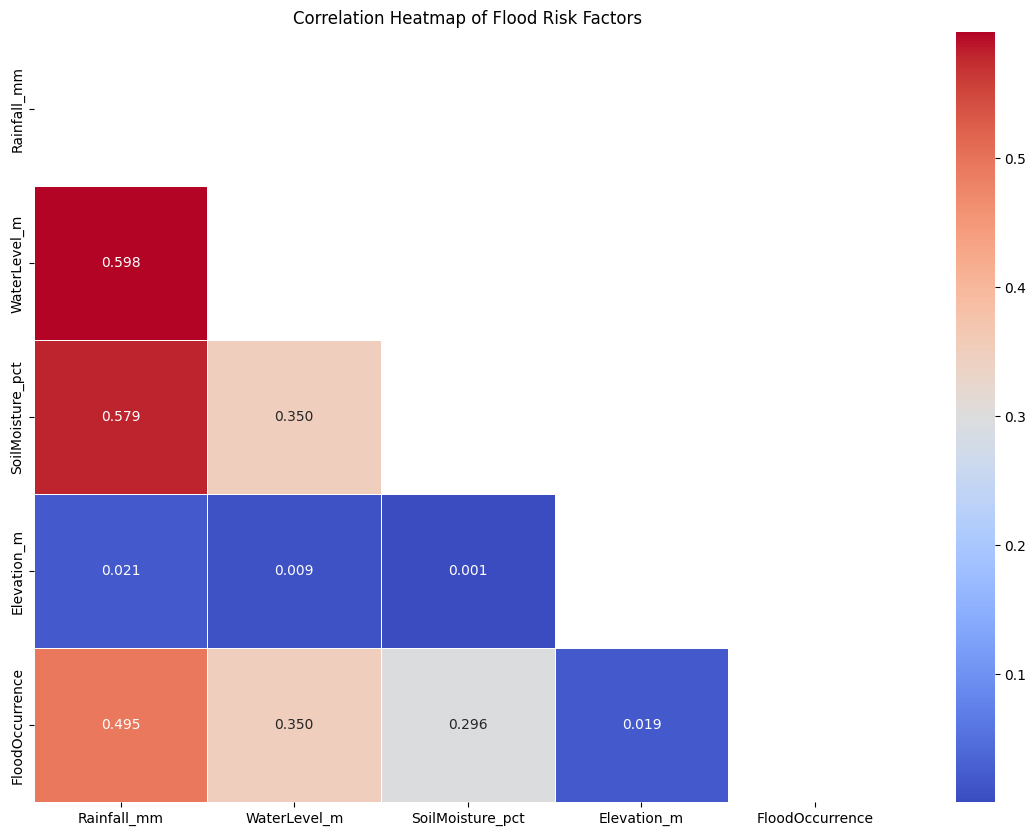

In [35]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm", 
            mask=mask, linewidths=.5)

plt.title('Correlation Heatmap of Flood Risk Factors')
#plt.savefig('correlation_heatmap.png')
plt.show()

In [37]:
df

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
0,2016-01-01,Quezon City,12.0,0.5,15.3,43,0
1,2016-01-01,Marikina,10.6,1.8,23.2,15,0
2,2016-01-01,Manila,5.7,0.5,15.6,5,0
3,2016-01-01,Pasig,3.7,0.5,5.0,5,0
4,2016-01-02,Quezon City,3.4,0.5,13.3,43,0
...,...,...,...,...,...,...,...
7303,2020-12-30,Pasig,16.9,1.4,16.8,5,0
7304,2020-12-31,Quezon City,7.2,0.7,25.6,43,0
7305,2020-12-31,Marikina,4.8,1.3,9.6,15,0
7306,2020-12-31,Manila,7.4,1.0,11.9,5,0


In [39]:
# Encode categorical
df['Location'] = LabelEncoder().fit_transform(df['Location'])


# Features & target
X = df.drop(['Date', 'FloodOccurrence'], axis=1)
y = df['FloodOccurrence']

In [54]:
# Scale
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Gradient Boosting 
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1443
           1       1.00      1.00      1.00        19

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462

[[1443    0]
 [   0   19]]


In [58]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1443
           1       1.00      1.00      1.00        19

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462

[[1443    0]
 [   0   19]]


**HYPERPARAMETER TUNING**

Since both models aren't performing well, we have fine-tune them to get better results.

In [48]:
# Check if the model can learn ANYTHING from the data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

print("Feature Importances:")
importances = rf.feature_importances_
feat_names = X.columns
for i in zip(feat_names, importances):
    print(f"{i[0]:30}: {i[1]:.3f}")


print("\nMax importance:", max(importances))

#If the highest importance is < 0.12–0.15 → the dataset has no real signal.
#(Real datasets have at least one feature > 0.25–0.50)

Feature Importances:
Location                      : 0.004
Rainfall_mm                   : 0.788
WaterLevel_m                  : 0.110
SoilMoisture_pct              : 0.097
Elevation_m                   : 0.002

Max importance: 0.787855373143025


In [52]:
# Check how much the target actually correlates with features
print(df.corr()['FloodOccurrence'].sort_values(ascending=False))

ValueError: could not convert string to float: '2016-01-01'